In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 61.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=854de051e2ccc1e29d6a6db73b38ff539a3a3edbcaf05da933078c74d23ae6c3
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=a528191b090c20ff2f10973d4a95f688a1bf72b30663e2415fc93f4c2bb5edfe
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=6f705c8a881242d709d9a5f105bc127a74aae361f6b20

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [47]:
book = "Stephen Hawking - A Life in Science"
startdate = 1700
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Stephen_Hawking"
titlename = "Stephen_Hawking"

In [48]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [49]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [54]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

18
1/chapter_1
1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11
1/chapter_12
1/chapter_13
1/chapter_14
1/chapter_15
1/chapter_16
1/chapter_17
1/chapter_18


In [55]:
mp_bert

{'1/chapter_1': [('keith richardsand donald trump', 0.4038),
  ('tothe day galileo', 0.385),
  ('breathing device', 0.3805),
  ('day galileo', 0.3775),
  ('notthe day galileo', 0.3757)],
 '1/chapter_2': [('classical cosmology', 0.6101),
  ('cosmology', 0.5785),
  ('cosmologists', 0.5727),
  ('theclassical cosmology', 0.5217),
  ('universe thateven einstein', 0.4776)],
 '1/chapter_3': [('oxford entrance examination', 0.4857),
  ('thenother oxford colleges', 0.4085),
  ('oxford university thefollowing october', 0.402),
  ('oxford', 0.3979),
  ('stephen hawking', 0.3926)],
 '1/chapter_4': [('cambridge university', 0.6518),
  ('cambridge', 0.6442),
  ('oxford', 0.5674),
  ('cambridge postgraduate', 0.5479),
  ('cambridgethat night', 0.4818)],
 '1/chapter_5': [('black holes', 0.528),
  ('blackhole', 0.4852),
  ('blackholes', 0.4471),
  ('big bang theory', 0.3902),
  ('big bang stretchedspace', 0.3702)],
 '1/chapter_6': [('physics fellowship', 0.6274),
  ('fellowships', 0.5595),
  ('fellowsh

In [56]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [57]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
13
15
15
15
14
15
15
15
15
15
15
15
14
15


In [58]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'experienced the prejudiceof', 'stephen hawkingwas', 'wheelchair', 'space time', 'close colleagues', 'cambridge', 'breathing device', 'theclassical cosmology', 'baby universes', 'universe thateven einstein', 'rowing club', 'Big Bang', 'rights', 'oxford entrance examination', 'hawking', 'handicapped students', 'Oxford and London', 'Time', 'stephen hawking website', 'oxford university thefollowing october', 'hundreds of thousands', 'theUniversity of Texas', 'quantum theory andthe end', 'disabled people', 'simon mitton', 'einstein award', 'hawking radiation', 'after theory', 'time machine', 'physics department', 'caltech hawking', 'mathematics physics', 'ent universes', 'Black', 'traditional approach', 'neutron star', 'oxford', 'string theory', 'hawking wit', 'hawking lecture', 'cosmic string', 'prejudiceof the establishment', 'infinite density', 'mitton knewthis', 'integral approach', 'chairwith the slumped', 'popular book', 'catalog htmlthe', 'illustrate his attitudeto', 'thousands of 

In [59]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Experienced_The_Prejudiceof_1950': ['1/chapter_1'], 'Demonstratedconsiderable_Liberalism_1950': ['1/chapter_1'], 'Keith_Richardsand_Donald_Trump_1950': ['1/chapter_1'], 'Private_School_1950': ['1/chapter_1'], 'Mathematics_Physics_1950': ['1/chapter_1'], 'Prejudiceof_The_Establishment_1950': ['1/chapter_1'], 'Washington_And_Waving_1950': ['1/chapter_1'], 'Breathing_Device_1950': ['1/chapter_1'], 'Notthe_Day_Galileo_1950': ['1/chapter_1'], 'Tothe_Day_Galileo_1950': ['1/chapter_1'], 'Day_Galileo_1950': ['1/chapter_1'], 'Nap_1950': ['1/chapter_1'], 'Nap_1960': ['1/chapter_3'], 'Nap_1962': ['1/chapter_4'], 'Nap_1965': ['1/chapter_6'], 'Nap_1970': ['1/chapter_8', '1/chapter_9'], 'Nap_1976': ['1/chapter_10'], 'Nap_1981': ['1/chapter_12'], 'Nap_1988': ['1/chapter_14'], 'Nap_1990': ['1/chapter_16', '1/chapter_18'], 'Rights_1950': ['1/chapter_1'], 'Rights_1920': ['1/chapter_2'], 'Rights_1960': ['1/chapter_3', '1/chapter_5', '1/chapter_7'], 'Rights_1962': ['1/chapter

In [60]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [61]:
key_yr_chap_mp

defaultdict(list,
            {'Experienced_The_Prejudiceof_1950': ['1/chapter_1'],
             'Demonstratedconsiderable_Liberalism_1950': ['1/chapter_1'],
             'Keith_Richardsand_Donald_Trump_1950': ['1/chapter_1'],
             'Private_School_1950': ['1/chapter_1'],
             'Mathematics_Physics_1950': ['1/chapter_1'],
             'Prejudiceof_The_Establishment_1950': ['1/chapter_1'],
             'Washington_And_Waving_1950': ['1/chapter_1'],
             'Breathing_Device_1950': ['1/chapter_1'],
             'Notthe_Day_Galileo_1950': ['1/chapter_1'],
             'Tothe_Day_Galileo_1950': ['1/chapter_1'],
             'Day_Galileo_1950': ['1/chapter_1'],
             'Nap_1950': ['1/chapter_1'],
             'Nap_1960': ['1/chapter_3'],
             'Nap_1962': ['1/chapter_4'],
             'Nap_1965': ['1/chapter_6'],
             'Nap_1970': ['1/chapter_8', '1/chapter_9'],
             'Nap_1976': ['1/chapter_10'],
             'Nap_1981': ['1/chapter_12'],
     

In [62]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Experienced_The_Prejudiceof_1950
Demonstratedconsiderable_Liberalism_1950
Keith_Richardsand_Donald_Trump_1950
Private_School_1950
Mathematics_Physics_1950
Prejudiceof_The_Establishment_1950
Washington_And_Waving_1950
Breathing_Device_1950
Notthe_Day_Galileo_1950
Tothe_Day_Galileo_1950
Day_Galileo_1950
Nap_1950
Nap_1960
Nap_1962
Nap_1965
Nap_1970
Nap_1976
Nap_1981
Nap_1988
Nap_1990
Rights_1950
Rights_1920
Rights_1960
Rights_1962
Rights_1965
Rights_1970
Rights_1976
Rights_1980
Rights_1981
Rights_1990
Fromlincoln_And_Washington_1950
Nucleusof_The_Brightest_1950
National_Academy_1920
National_Academy_1960
National_Academy_1962
National_Academy_1965
National_Academy_1980
National_Academy_1981
National_Academy_1970
National_Academy_1990
Special_Theory_1920
Sciencesecond_Edition_1920
Sciencesecond_Edition_1960
Cosmologists_1920
Space_Time_1920
Space_Time_1980
Classical_Cosmology_1920
Theclassical_Cosmology_1920
Academy_Of_Sciences_1920
Academy_Of_Sciences_1960
Academy_Of_Sciences_1965
Academy

In [63]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [64]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Family', 'Primary_and_secondary_school_years', 'Undergraduate_years', 'Post-graduate_years', 'Career', '1966–1975', '1975–1990', '1990–2000', '2000–2018', 'Personal_life', 'Marriages', 'Disability', 'Disability_outreach', 'Plans_for_a_trip_to_space', 'Death', 'Personal_views', 'Philosophy_is_unnecessary', 'Future_of_humanity', 'Religion_and_atheism', 'Politics', 'Appearances_in_popular_media', 'Awards_and_honours', 'Medal_for_Science_Communication', 'Publications', 'Popular_books', 'Co-authored', 'Forewords', "Children's_fiction", 'Films_and_series', 'Selected_academic_works', 'Notes', 'See_also', 'References', 'Citations', 'Sources', 'External_links']


In [65]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [66]:
mp_sim_score

{'Family->Demonstratedconsiderable_Liberalism_1950': tensor(0.1094, device='cuda:0'),
 'Family->Keith_Richardsand_Donald_Trump_1950': tensor(0.1515, device='cuda:0'),
 'Family->Private_School_1950': tensor(0.1814, device='cuda:0'),
 'Family->Mathematics_Physics_1950': tensor(0.3007, device='cuda:0'),
 'Family->Washington_And_Waving_1950': tensor(0.0441, device='cuda:0'),
 'Family->Breathing_Device_1950': tensor(0.1072, device='cuda:0'),
 'Family->Notthe_Day_Galileo_1950': tensor(0.3616, device='cuda:0'),
 'Family->Tothe_Day_Galileo_1950': tensor(0.3616, device='cuda:0'),
 'Family->Day_Galileo_1950': tensor(0.3616, device='cuda:0'),
 'Family->Nap_1950': tensor(0.0502, device='cuda:0'),
 'Family->Nap_1960': tensor(-0.0128, device='cuda:0'),
 'Family->Nap_1962': tensor(-0.0137, device='cuda:0'),
 'Family->Nap_1965': tensor(-0.0131, device='cuda:0'),
 'Family->Nap_1970': tensor(-0.0178, device='cuda:0'),
 'Family->Nap_1976': tensor(-0.0159, device='cuda:0'),
 'Family->Nap_1981': tensor(-0.

In [67]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [68]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [69]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [70]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

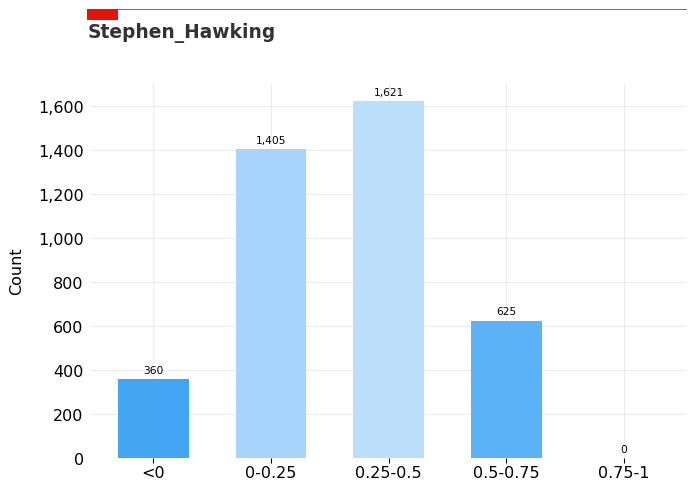

In [71]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [72]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': -1, 'Family': 1952, 'Primary_and_secondary_school_years': 1958, 'Undergraduate_years': 1960, 'Post-graduate_years': 1965, 'Career': -1, '1966–1975': 1971, '1975–1990': 1982, '1990–2000': 1993, '2000–2018': 2008, 'Personal_life': -1, 'Marriages': 1980, 'Disability': 1997, 'Disability_outreach': 2012, 'Plans_for_a_trip_to_space': 2007, 'Death': 2018, 'Personal_views': -1, 'Philosophy_is_unnecessary': 2011, 'Future_of_humanity': 2008, 'Religion_and_atheism': 2014, 'Politics': 2014, 'Appearances_in_popular_media': 2010, 'Awards_and_honours': 1988, 'Medal_for_Science_Communication': 2016, 'Publications': -1, 'Popular_books': -1, 'Co-authored': -1, 'Forewords': -1, "Children's_fiction": -1, 'Films_and_series': -1, 'Selected_academic_works': -1, 'Notes': -1, 'See_also': -1, 'References': -1, 'Citations': -1, 'Sources': -1}


In [73]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [74]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


142


In [75]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Family   ->  90
Primary_and_secondary_school_years   ->  81
Undergraduate_years   ->  98
Post-graduate_years   ->  125
1966–1975   ->  115
1975–1990   ->  126
1990–2000   ->  117
2000–2018   ->  118
Marriages   ->  100
Disability   ->  87
Disability_outreach   ->  74
Plans_for_a_trip_to_space   ->  89
Death   ->  85
Philosophy_is_unnecessary   ->  102
Future_of_humanity   ->  87
Religion_and_atheism   ->  101
Politics   ->  74
Appearances_in_popular_media   ->  87
Awards_and_honours   ->  113
Medal_for_Science_Communication   ->  83


In [76]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [77]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Family  ->   ['Notthe_Day_Galileo_1950', 'Tothe_Day_Galileo_1950', 'Day_Galileo_1950', 'Mathematics_Physics_1950', 'Oxford_1962']
Primary_and_secondary_school_years  ->   ['Examination_Halls_1960', 'Sciencesecond_Edition_1960', 'Private_School_1950']
Undergraduate_years  ->   ['Reserved.Stephen_Hawking_1960', 'Thenother_Oxford_Colleges_1960', 'Oxford_Entrance_Examination_1960', 'Oxford_1960', 'Academy_Of_Sciences_1960']
Post-graduate_years  ->   ['Hawking_Family_1965', 'Stephen_Hawking_1965', 'Reserved.Stephen_Hawking_1965', 'Physics_Fellowship_1965', 'Fellowship_1965']
1966–1975  ->   ['Big_Bang_Singularity_1970', 'Theoretical_Physics_1970', 'Hawkingradiation_1970', 'Hawking_Radiation_1970', 'Black_Hole_1970']
1975–1990  ->   ['Stephen_Hawkingwas_1981', 'Reserved.Stephen_Hawking_1981', 'Nobel_Prize_1981', 'Albert_Einstein_Award_1981', 'Einstein_Award_1981']
1990–2000  ->   ['Chronology_Protection_1990', 'Cosmic_String_1990']
2000–2018  ->   ['Time_1990', 'Spatial_Dimensions_1980']
Mar

In [78]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [79]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [80]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [81]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Academy Of Sciences', 'Reserved.Stephen Hawking', 'Oxford', 'Stephen Hawking', 'Hawking', 'Hawking Family', 'Big Bang Theory', 'Black Hole', 'Blackhole', 'Sciencesecond Edition', 'Professor Stephen Hawking', 'Theoretical Physics', 'Black Holes', 'Space Time']
14
{'Family': 1, 'Primary_and_secondary_school_years': 0, 'Undergraduate_years': 1, 'Post-graduate_years': 1, '1966–1975': 3, '1975–1990': 0, '1990–2000': 0, '2000–2018': 1, 'Marriages': 1, 'Disability': 0, 'Disability_outreach': 1, 'Plans_for_a_trip_to_space': 0, 'Awards_and_honours': 0}


In [82]:
print(sum(list(mp2.values())))

9


In [83]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Family': {'Oxford'}, 'Primary_and_secondary_school_years': set(), 'Undergraduate_years': set(), 'Post-graduate_years': set(), '1966–1975': set(), '1975–1990': set(), '1990–2000': set(), '2000–2018': set(), 'Marriages': set(), 'Disability': set(), 'Disability_outreach': set(), 'Plans_for_a_trip_to_space': set(), 'Awards_and_honours': set()}
{'Family': 1, 'Primary_and_secondary_school_years': 0, 'Undergraduate_years': 0, 'Post-graduate_years': 0, '1966–1975': 0, '1975–1990': 0, '1990–2000': 0, '2000–2018': 0, 'Marriages': 0, 'Disability': 0, 'Disability_outreach': 0, 'Plans_for_a_trip_to_space': 0, 'Awards_and_honours': 0}
1


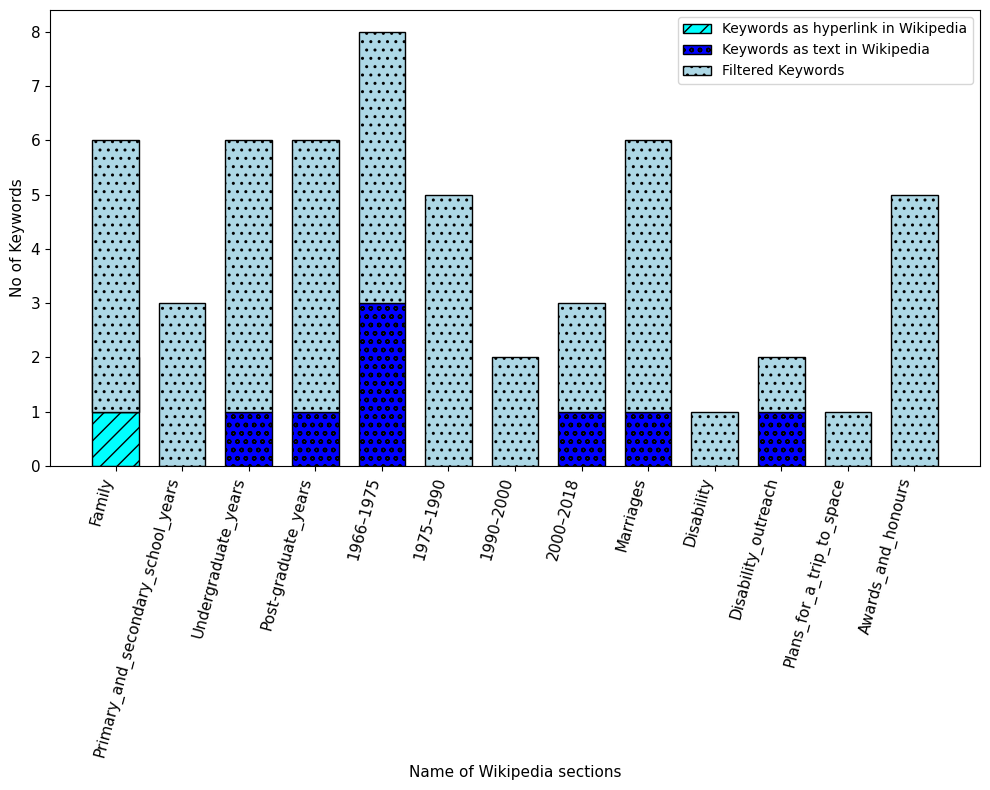

In [84]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [85]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Einstein_Award', 'Mathematics_Physics', 'Hawking', 'Cosmic_String', 'Hawking_Family', 'Theoretical_Physics', 'Chairwith_The_Slumped', 'Difficult_Book', 'Quantum_Gravity', 'Thousands_Of_Miles', 'Sciencesecond_Edition', 'Academy_Of_Sciences', 'Thenother_Oxford_Colleges', 'Time', 'Physics_Fellowship', 'Way_Physicists', 'Book_Stephen_Hawking', 'Stephen_Hawking', 'Hawking_Radiation', 'Black_Hole', 'Stephen_Hawkingwas', 'Day_Galileo', 'Oxford_Entrance_Examination', 'After_Theory', 'Notthe_Day_Galileo', 'Oxford', 'Reserved.Stephen_Hawking', 'Fellowship', 'Hawkingradiation', 'Examination_Halls', 'Chronology_Protection', 'Tothe_Day_Galileo', 'Nobel_Prize', 'Spatial_Dimensions', 'Disabled_People', 'Albert_Einstein_Award', 'Private_School', 'Big_Bang_Singularity', 'Professor_Stephen_Hawking'}


In [86]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

1560
{'St_Albans_School,_Hertfordshire', 'Terence_Tao', 'Bekenstein%E2%80%93Hawking_formula', 'John_Davidson_(chemical_engineer)', 'Big_Bang_nucleosynthesis', 'Impact_event', 'Reduced-gravity_aircraft', 'Knowledge', 'Fran%C3%A7ois_Englert', 'Cosmic_Background_Explorer', 'Artificial_general_intelligence#Controversies_and_dangers', 'Maxwell_Medal_and_Prize', 'Democratic_Party_(United_States)', 'Anne_L%27Huillier', 'Spacetime', 'Universal_basic_income', 'Mstislav_Rostropovich', 'World_Central_Kitchen', 'The_Theory_of_Everything_(2014_film)', 'Charles_David_Allis', 'Ashoke_Sen', 'Category:Alumni_of_University_College,_Oxford', 'Sergio_Ferrara', 'Government_of_Israel', 'Center_for_Human-Compatible_Artificial_Intelligence', 'George%27s_Secret_Key_to_the_Universe', 'Jacques_Miller', 'Jaan_Tallinn', 'Template_talk:Wolf_Prize_in_Physics', 'The_Nature_of_Space_and_Time', 'Richard_Taylor_(mathematician)', 'Daniel_Kleppner', 'Dirac_Prize', 'Robert_S._Langer', 'Alim_Louis_Benabid', 'Jeffrey_M._Frie

In [87]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Oxford', 'Albert_Einstein_Award'}


2

In [88]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Academy_Of_Sciences_1960', 'Big_Bang_Singularity_1970', 'Nobel_Prize_1981', 'Time_1990', 'Mathematics_Physics_1950', 'Albert_Einstein_Award_1981', 'Quantum_Gravity_1980', 'Private_School_1950', 'Cosmic_String_1990', 'Thenother_Oxford_Colleges_1960', 'Einstein_Award_1981', 'Oxford_1962', 'Notthe_Day_Galileo_1950', 'Hawking_1980', 'Examination_Halls_1960', 'Hawking_Family_1965', 'Physics_Fellowship_1965', 'Spatial_Dimensions_1980', 'Hawkingradiation_1970', 'Hawking_Radiation_1970', 'Reserved.Stephen_Hawking_1960', 'Stephen_Hawkingwas_1981', 'Chairwith_The_Slumped_1976', 'Reserved.Stephen_Hawking_1981', 'Tothe_Day_Galileo_1950', 'Day_Galileo_1950', 'Sciencesecond_Edition_1960', 'Way_Physicists_1980', 'Thousands_Of_Miles_1970', 'Theoretical_Physics_1970', 'Black_Hole_1970', 'Stephen_Hawking_1988', 'Professor_Stephen_Hawking_1988', 'Oxford_Entrance_Examination_1960', 'Book_Stephen_Hawking_1988', 'After_Theory_1980', 'Fellowship_1965', 'Chronology_Protection_1990', 'Black_Hole_1980', 'Rese

In [89]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Private_School_1950': ['1/chapter_1'], 'Mathematics_Physics_1950': ['1/chapter_1'], 'Notthe_Day_Galileo_1950': ['1/chapter_1'], 'Tothe_Day_Galileo_1950': ['1/chapter_1'], 'Day_Galileo_1950': ['1/chapter_1'], 'Sciencesecond_Edition_1960': ['1/chapter_3'], 'Academy_Of_Sciences_1960': ['1/chapter_3', '1/chapter_5', '1/chapter_7'], 'Reserved.Stephen_Hawking_1960': ['1/chapter_3', '1/chapter_7'], 'Reserved.Stephen_Hawking_1965': ['1/chapter_6'], 'Reserved.Stephen_Hawking_1981': ['1/chapter_12'], 'Reserved.Stephen_Hawking_1988': ['1/chapter_14'], 'Thenother_Oxford_Colleges_1960': ['1/chapter_3'], 'Hawking_1980': ['1/chapter_15'], 'Examination_Halls_1960': ['1/chapter_3'], 'Stephen_Hawking_1965': ['1/chapter_6'], 'Stephen_Hawking_1988': ['1/chapter_14'], 'Oxford_1960': ['1/chapter_3'], 'Oxford_1962': ['1/chapter_4'], 'Oxford_Entrance_Examination_1960': ['1/chapter_3'], 'Theoretical_Physics_1970': ['1/chapter_8'], 'Black_Hole_1970': ['1/chapter_9', '1/chapter_13'], 'Black_Hole_1980': ['1/cha

In [90]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['academy of sciences', 'big bang singularity', 'nobel prize', 'time', 'mathematics physics', 'albert einstein award', 'quantum gravity', 'private school', 'cosmic string', 'thenother oxford colleges', 'einstein award', 'oxford', 'notthe day galileo', 'hawking', 'examination halls', 'hawking family', 'physics fellowship', 'spatial dimensions', 'hawkingradiation', 'hawking radiation', 'reserved.stephen hawking', 'stephen hawkingwas', 'chairwith the slumped', 'reserved.stephen hawking', 'tothe day galileo', 'day galileo', 'sciencesecond edition', 'way physicists', 'thousands of miles', 'theoretical physics', 'black hole', 'stephen hawking', 'professor stephen hawking', 'oxford entrance examination', 'book stephen hawking', 'after theory', 'fellowship', 'chronology protection', 'black hole', 'reserved.stephen hawking', 'disabled people', 'oxford', 'reserved.stephen hawking', 'stephen hawking', 'difficult book']


In [91]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

13
45
0.28888888888888886
